In [3]:
from torch import nn

In [2]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

In [25]:
torch.manual_seed(7)
features=torch.randn((1,5))
weights=torch.rand_like(features)
bias=torch.randn((1,1))

In [26]:
features

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])

In [27]:
weights

tensor([[0.2868, 0.2063, 0.4451, 0.3593, 0.7204]])

In [29]:
sigmoid(torch.sum(torch.mm(features,weights.resize_(5,1)) + bias))

tensor(0.6140)

In [57]:
torch.manual_seed(7)
features=torch.randn(1,3)
n_input=features.shape[1]
n_hidden=2
n_output=1
W1=torch.randn(n_input,n_hidden)
W2=torch.randn(n_hidden,n_output)
B1=torch.randn(1,n_hidden)
B2=torch.randn(1,n_output)

In [58]:
h = sigmoid(torch.mm(features,W1) +B1)
op = sigmoid(torch.mm(h,W2) +B2 )
op

tensor([[0.3171]])

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [10]:
from torchvision import datasets,transforms

transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,)),
                              ])

trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [11]:
dataiter = iter(trainloader)
images,labels=dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


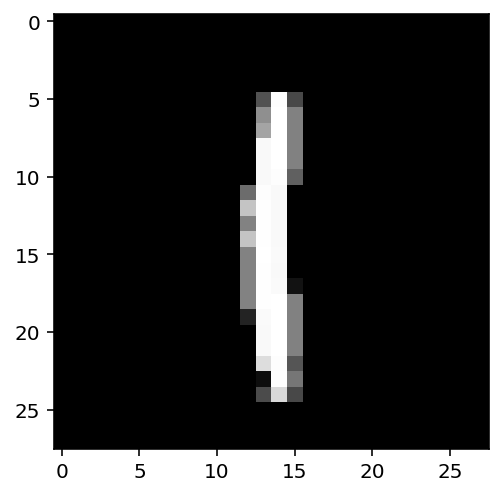

In [12]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')

In [13]:
print((images.resize_(64,784)).shape)

torch.Size([64, 784])


In [14]:
inputs=images.view(images.shape[0],-1)

In [15]:
w1=torch.randn(784,256)
b1=torch.randn(256)

w2=torch.randn(256,10)
b2=torch.randn(10)

h=sigmoid(torch.mm(inputs,w1)+b1)
out=torch.mm(h,w2)+b2

In [16]:
out.shape

torch.Size([64, 10])

In [17]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

In [18]:
probabilities = softmax(out)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [19]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784,256)
        self.output = nn.Linear(256,10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self,x):
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        
        return x

In [20]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [21]:
class Networknow(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        x=self.hidden1(x)
        x=self.relu(x)
        x=self.hidden2(x)
        x=self.relu(x)
        x=self.output(x)
        x=self.softmax(x)
        
        return x

In [24]:
model=Networknow()
model

Networknow(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
  (relu): ReLU()
)

# Losses in PyTorch

In [5]:
import torch.nn.functional as F
from torchvision import datasets,transforms

In [6]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,)),
                               ])

In [7]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [8]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10))
criterion =nn.CrossEntropyLoss()
images,label=next(iter(trainloader))
images=images.view(images.shape[0],-1)
logits=model(images)
loss=criterion(logits,label)
print(loss)

tensor(2.2980, grad_fn=<NllLossBackward>)


In [9]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images,label=next(iter(trainloader))
images=images.view(images.shape[0],-1)
logits=model(images)
loss=criterion(logits,label)
print(loss)

tensor(2.3010, grad_fn=<NllLossBackward>)


# Autograd

In [29]:
x = torch.randn(2,2,requires_grad=True)
print(x)

tensor([[-0.1151,  1.3497],
        [ 0.2478, -1.6208]], requires_grad=True)


In [30]:
y=x**2
print(y)

tensor([[0.0132, 1.8216],
        [0.0614, 2.6271]], grad_fn=<PowBackward0>)


In [31]:
print(y.grad_fn)

In [32]:
z=y.mean()
print(z)

tensor(1.1308, grad_fn=<MeanBackward0>)


In [35]:
print(x.grad)

tensor([[-0.0576,  0.6748],
        [ 0.1239, -0.8104]])


In [34]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.0576,  0.6748],
        [ 0.1239, -0.8104]])
tensor([[-0.0576,  0.6748],
        [ 0.1239, -0.8104]], grad_fn=<DivBackward0>)


In [36]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images,label=next(iter(trainloader))
images=images.view(images.shape[0],-1)
logits=model(images)
loss=criterion(logits,label)
print(loss)

tensor(2.3266, grad_fn=<NllLossBackward>)


# Calculating gradients

In [37]:
print("Before backward pass:\n",model[0].weight.grad)
loss.backward()
print('After backward pass:\n',model[0].weight.grad)

Before backward pass:
 None
After backward pass:
 tensor([[ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021],
        ...,
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020]])


### we know how to calculate losses and use those losses to calculate gradients now to use those gradient values to update the weights

# Optimizer

In [46]:
from torch import optim
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [48]:
print('Initial Weights -',model[0].weight)

images,labels = next(iter(trainloader))
images.resize_(64,784)
optimizer.zero_grad()

output=model.forward(images)
loss=criterion(output,labels)
loss.backward()
print('Gradient -',model[0].weight.grad)

Initial Weights - Parameter containing:
tensor([[ 0.0188, -0.0161,  0.0271,  ...,  0.0096, -0.0342, -0.0194],
        [-0.0105,  0.0262,  0.0290,  ..., -0.0167,  0.0019, -0.0041],
        [-0.0204, -0.0342,  0.0042,  ...,  0.0143,  0.0049,  0.0081],
        ...,
        [-0.0303, -0.0157,  0.0119,  ..., -0.0353,  0.0313,  0.0019],
        [ 0.0101, -0.0012,  0.0058,  ..., -0.0222, -0.0289, -0.0202],
        [ 0.0218,  0.0249, -0.0040,  ...,  0.0135, -0.0098, -0.0097]],
       requires_grad=True)
Gradient - tensor([[ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0040, -0.0040, -0.0040,  ..., -0.0040, -0.0040, -0.0040],
        ...,
        [ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005]])


In [49]:
optimizer.step()
print('Updated weights-',model[0].weight)

Updated weights- Parameter containing:
tensor([[ 0.0188, -0.0161,  0.0271,  ...,  0.0096, -0.0342, -0.0194],
        [-0.0105,  0.0262,  0.0290,  ..., -0.0167,  0.0019, -0.0041],
        [-0.0203, -0.0341,  0.0042,  ...,  0.0143,  0.0049,  0.0081],
        ...,
        [-0.0303, -0.0157,  0.0119,  ..., -0.0353,  0.0312,  0.0019],
        [ 0.0101, -0.0012,  0.0058,  ..., -0.0222, -0.0289, -0.0202],
        [ 0.0218,  0.0249, -0.0040,  ...,  0.0135, -0.0098, -0.0097]],
       requires_grad=True)


In [59]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    
    for image,label in trainloader:
        image=image.view(image.shape[0],-1)
        optimizer.zero_grad()
        
        output = model.forward(image)
        loss = criterion(output,label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        

Training loss: 1.9184634827855807
Training loss: 0.8629738220782168
Training loss: 0.5211439549382816
Training loss: 0.42739707928921367
Training loss: 0.3856481939300037


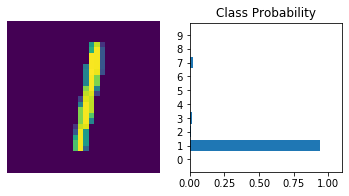

In [75]:
%matplotlib inline
import helper

images,labels = next(iter(trainloader))

img = images[0].view(1,784)
with torch.no_grad():
    logits = model.forward(img)
ps = F.softmax(logits,dim=1)
view_classify(img.view(1,28,28),ps)

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>